---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

## Feature Selection

In [21]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [14]:
# Define the binary target variable
df = pd.read_csv("../../data/processed-data/pitstop_with_positions.csv")
df['points_category'] = df['position'].apply(lambda x: 1 if x <= 10 else 0)


In [15]:
df.head()

,Unnamed: 0,Year,Round,RaceName,DriverID,Lap1,Lap2,Lap3,Lap4,Lap5,...,Duration2,Duration3,Duration4,Duration5,Duration6,Duration7,constructorName,position,grid,points_category
0,0,2011,1,Australian Grand Prix,alguersuari,-1.492522,-0.208201,1.339923,-0.281099,-0.15023,...,0.733521,1.882538,-0.277274,-0.130754,-0.060017,-0.01976,AlphaTauri,11.0,12.0,0
1,1,2011,1,Australian Grand Prix,alonso,-0.414215,0.355923,1.723412,-0.281099,-0.15023,...,0.755727,1.679973,-0.277274,-0.130754,-0.060017,-0.01976,Ferrari,4.0,5.0,1
2,2,2011,1,Australian Grand Prix,ambrosio,-0.218159,0.976458,-0.577525,-0.281099,-0.15023,...,0.896614,-0.580401,-0.277274,-0.130754,-0.060017,-0.01976,Marussia,14.0,22.0,0
3,3,2011,1,Australian Grand Prix,barrichello,-0.316187,0.130273,0.956433,3.039918,-0.15023,...,1.835036,0.998617,3.860649,-0.130754,-0.060017,-0.01976,Williams,16.0,17.0,0
4,4,2011,1,Australian Grand Prix,buemi,-0.120131,0.468747,-0.577525,-0.281099,-0.15023,...,0.621420,-0.580401,-0.277274,-0.130754,-0.060017,-0.01976,AlphaTauri,8.0,10.0,1


In [23]:
# Define features and target
features = [
    "Year",
    "Lap1", "Lap2", "Lap3", "Lap4", "Lap5",
    "Stop1", "Stop2", "Stop3", "Stop4", "Stop5", 
    "Duration1", "Duration2", "Duration3", "Duration4", "Duration5",
    "Duration6", "Duration7", "grid"
]
X = df[features]
y = df["points_category"]  


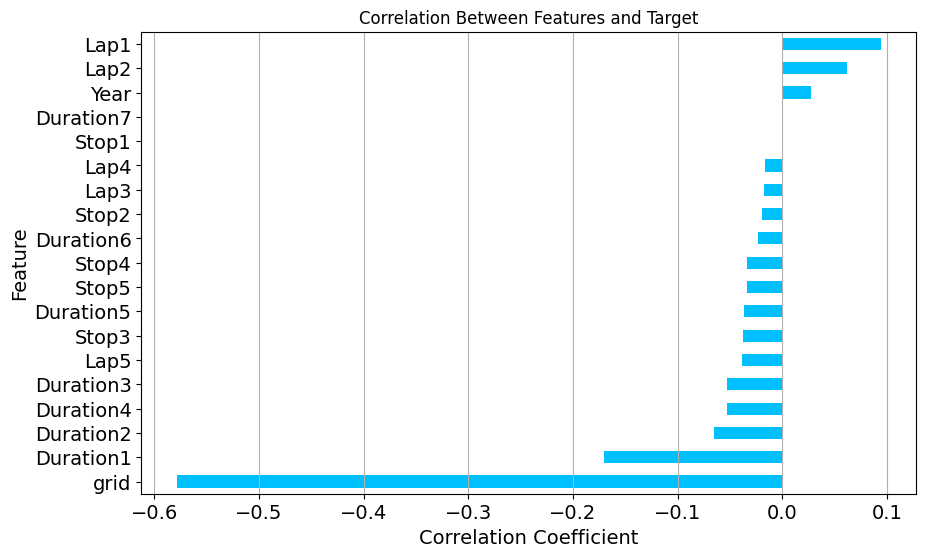

In [30]:
# 1. Correlation Analysis
plt.figure(figsize=(10, 6))
correlations = X.corrwith(y)
correlations.sort_values().plot(kind='barh', color='deepskyblue')
plt.title("Correlation Between Features and Target")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.grid(axis='x')
plt.show()

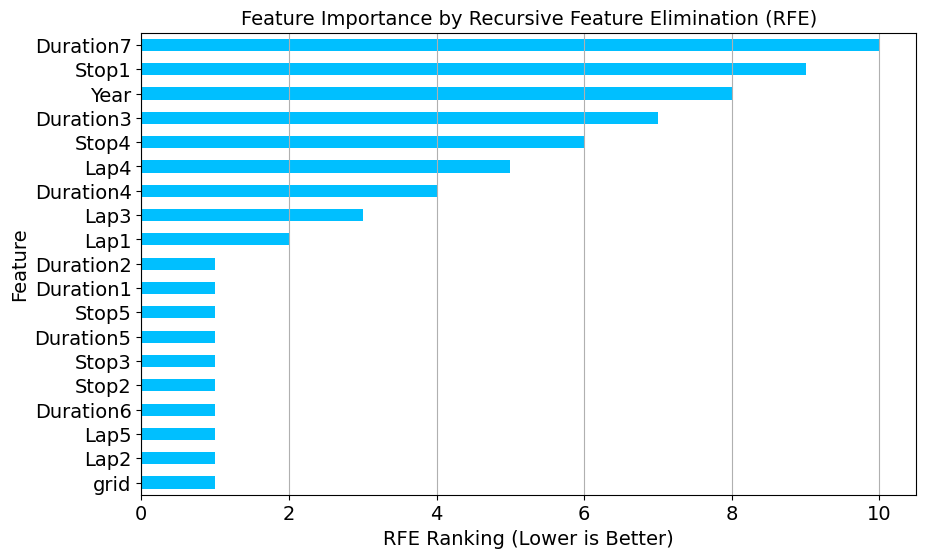

In [33]:
# 2. Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
rfe_ranking = pd.Series(rfe.ranking_, index=features).sort_values()

plt.figure(figsize=(10, 6))
rfe_ranking.plot(kind='barh', color='deepskyblue')
plt.title("Feature Importance by Recursive Feature Elimination (RFE)", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("RFE Ranking (Lower is Better)", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.grid(axis='x')
plt.show()

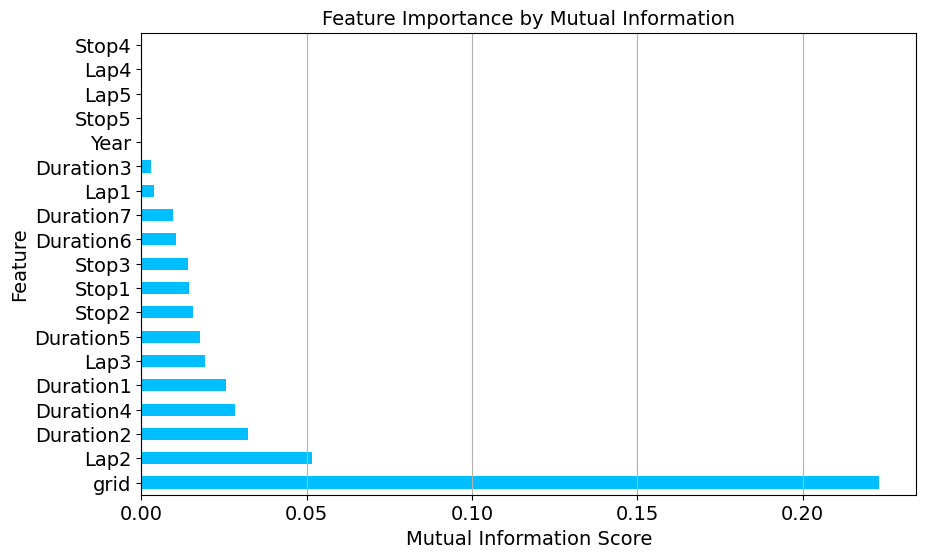

In [36]:
# 3. Mutual Information
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info_series = pd.Series(mutual_info, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='barh', color='deepskyblue')
plt.title("Feature Importance by Mutual Information", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xlabel("Mutual Information Score", fontsize=14)
plt.grid(axis='x')
plt.show()

features:
grid, Year, Duration1, Duration2, Duration3, Duration4, Lap1, Lap2, Lap3, Stop2